In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [2]:
df = pd.read_csv('./data/car_ad.csv', encoding='ISO-8859-1')
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,9576.0,15633.317316,24106.523436,0.0,4999.0,9200.0,16700.0,547800.00
mileage,9576.0,138.862364,98.629754,0.0,70.0,128.0,194.0,999.00
engV,9142.0,2.646344,5.927699,0.1,1.6,2.0,2.5,99.99
year,9576.0,2006.605994,7.067924,1953.0,2004.0,2008.0,2012.0,2016.00


In [4]:
prices = df['price'].copy()
prices

0       15500.0
1       20500.0
2       35000.0
3       17800.0
4       33000.0
         ...   
9571    14500.0
9572     2200.0
9573    18500.0
9574    16999.0
9575    22500.0
Name: price, Length: 9576, dtype: float64

In [5]:
mean_prices = prices.mean()
mean_prices

15633.31731596178

In [6]:
variance_prices = prices.var(ddof=1)
variance_prices

581124472.1538435

In [7]:
std_prices = prices.std(ddof=1)
std_prices

24106.52343565624

In [8]:
median_prices = prices.median()
median_prices

9200.0

In [9]:
q1_prices = prices.quantile(0.25)
q2_prices = prices.quantile(0.5)
q3_prices = prices.quantile(0.75)

q1_prices, q2_prices, q3_prices

(4999.0, 9200.0, 16700.0)

In [10]:
df.describe()['price'][['mean', 'std', '25%', '50%', '75%']]

mean    15633.317316
std     24106.523436
25%      4999.000000
50%      9200.000000
75%     16700.000000
Name: price, dtype: float64

<AxesSubplot:>

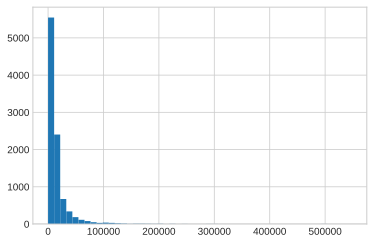

In [11]:
df['price'].hist(bins=50)

<AxesSubplot:>

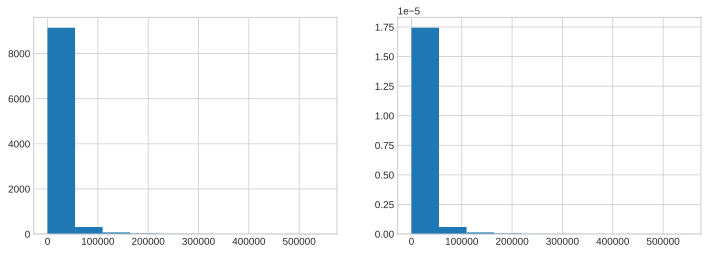

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

df['price'].hist(ax=ax1)
df['price'].hist(ax=ax2, density=True)

<AxesSubplot:>

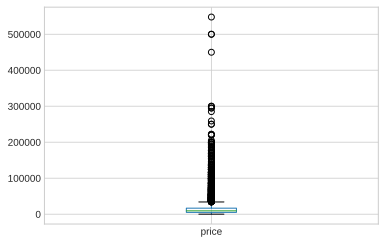

In [13]:
df[['price']].boxplot()

<AxesSubplot:ylabel='price'>

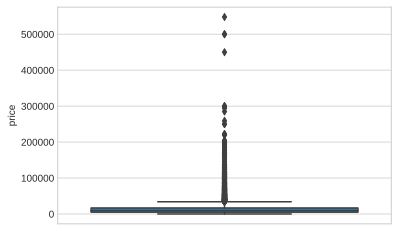

In [14]:
sns.boxplot(data=df, y='price')

In [15]:
q1, q3 = df['price'].quantile([0.25, 0.75])

iqr = q3 - q1
boxplot_range = [0, q3 + 1.5 * iqr]
boxplot_range

[0, 34251.5]

In [16]:
outliers = df.loc[(df['price'] < boxplot_range[0]) | (df['price'] > boxplot_range[1])]
outliers.shape

(899, 10)

In [17]:
print(round(outliers.shape[0] / df.shape[0] * 100, 2), '%')

9.39 %


### Задача 1. Даны значения зарплат из выборки выпускников: 

[100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.

In [18]:
salaries = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]
mean = sum(salaries) / len(salaries)
df = len(salaries) - 1

round((sum((x - mean)**2 for x in salaries) / df)**(1/2), 8)

47.34795214

### Задача 2
Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении “усов” в boxplot, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.

In [19]:
q1, q3 = salaries[len(salaries) // 4], salaries[len(salaries) * 3 // 4]
iqr = q3 - q1
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

len([x for x in salaries if x < boxplot_range[0] or x > boxplot_range[1]])

2

### Задача 3
В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
1. студент учится на факультете A,
2. студент учится на факультете B,
3. студент учится на факультете C?

In [20]:
p_a = 100 / 235
p_b = 90 / 235
p_c = 45 / 235
p_h = p_a * 0.6 + p_b * 0.7 + p_c * 0.8

p_ah = round(p_a * 0.6 / p_h * 100, 2)
p_bh = round(p_b * 0.7 / p_h * 100, 2)
p_ch = round(p_c * 0.8 / p_h * 100, 2)

print("A - {}%\nB - {}%\nC - {}%".format(p_ah * 1, p_bh, p_ch))

A - 37.74%
B - 39.62%
C - 22.64%
